# Importing necessary libaries and packages

In [1]:
import pandas as pd
import scipy.stats as stats

In [20]:
# Load the dataset
df = pd.read_excel('../inputs/data.xlsx')

In [21]:
df.head()

,Country,State,City,BUYbroccoli,BUYasparagus,BUYsquash,BUYcupcakes,BUYcheesecake,BUYdonut,BUYcocacola,...,Pvalue_Utilitarian,EBTuser,HouseholdType,Female,Age,Income,logincome,Household_size,Education,Degree
0,United States,MN,Saint Cloud,1,1,1,1,0,1,1,...,1.50,0,Non-SNAP,0,39,95000,11.461643,4.0,2,0
1,United States,AR,Mountain Home,1,1,0,1,0,0,1,...,3.25,0,Non-SNAP,0,46,35000,10.463132,1.0,3,0
2,United States,IL,Hanover Park,0,0,0,1,1,1,1,...,4.25,0,Non-SNAP,1,27,65000,11.082158,3.0,4,0
3,United States,ME,Poland,1,1,1,0,0,0,0,...,2.75,0,Non-SNAP,0,33,65000,11.082158,2.0,3,0
4,United States,GA,Stockbridge,1,1,1,0,0,0,0,...,4.25,0,Non-SNAP,0,28,95000,11.461643,2.0,3,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        1002 non-null   object 
 1   State                          990 non-null    object 
 2   City                           981 non-null    object 
 3   BUYbroccoli                    1002 non-null   int64  
 4   BUYasparagus                   1002 non-null   int64  
 5   BUYsquash                      1002 non-null   int64  
 6   BUYcupcakes                    1002 non-null   int64  
 7   BUYcheesecake                  1002 non-null   int64  
 8   BUYdonut                       1002 non-null   int64  
 9   BUYcocacola                    1002 non-null   int64  
 10  BUYmuesli                      1002 non-null   int64  
 11  Number_HedonicProducts         1002 non-null   int64  
 12  Number_UtilitarianProducts     1002 non-null   i

In [25]:
# Split the data into SNAP and non-SNAP households
snap_data = df[df['HouseholdType'] == 'SNAP']
non_snap_data = df[df['HouseholdType'] == 'Non-SNAP']

# Q1: Does the type of food purchased by SNAP houesholds differ from those purchased by non-SNAP housesholds?

## Perform statistical tests to compare the purchases of hedonic and utilitarian food items

In [28]:
# Test for Number of Hedonic Products
hedonic_snap = snap_data['Number_HedonicProducts']
hedonic_non_snap = non_snap_data['Number_HedonicProducts']
t_statistic, p_value = stats.ttest_ind(hedonic_snap, hedonic_non_snap)
print("Number of Hedonic Products:")
print("SNAP vs. Non-SNAP")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Number of Hedonic Products:
SNAP vs. Non-SNAP
t-statistic: 4.922089850084236
p-value: 1.0009968767798903e-06


In [30]:
# Test for Number of Utilitarian Products
utilitarian_snap = snap_data['Number_UtilitarianProducts']
utilitarian_non_snap = non_snap_data['Number_UtilitarianProducts']
t_statistic, p_value = stats.ttest_ind(utilitarian_snap, utilitarian_non_snap)
print("Number of Utilitarian Products:")
print("SNAP vs. Non-SNAP")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Number of Utilitarian Products:
SNAP vs. Non-SNAP
t-statistic: -3.6058224820172438
p-value: 0.0003265336401862399


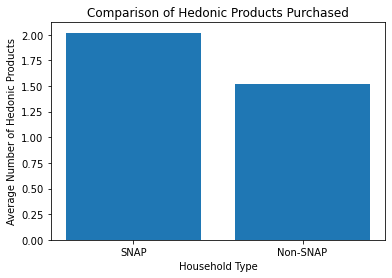

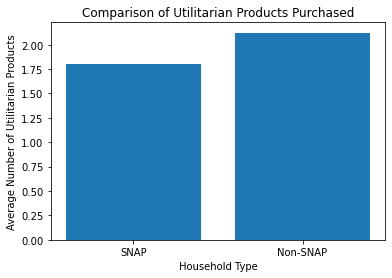

In [32]:
import matplotlib.pyplot as plt

# Calculate the average number of hedonic and utilitarian products for SNAP and non-SNAP households
avg_hedonic_snap = snap_data['Number_HedonicProducts'].mean()
avg_hedonic_non_snap = non_snap_data['Number_HedonicProducts'].mean()

avg_utilitarian_snap = snap_data['Number_UtilitarianProducts'].mean()
avg_utilitarian_non_snap = non_snap_data['Number_UtilitarianProducts'].mean()

# Create a bar plot to compare the average number of hedonic products
plt.bar(['SNAP', 'Non-SNAP'], [avg_hedonic_snap, avg_hedonic_non_snap])
plt.xlabel('Household Type')
plt.ylabel('Average Number of Hedonic Products')
plt.title('Comparison of Hedonic Products Purchased')
plt.show()

# Create a bar plot to compare the average number of utilitarian products
plt.bar(['SNAP', 'Non-SNAP'], [avg_utilitarian_snap, avg_utilitarian_non_snap])
plt.xlabel('Household Type')
plt.ylabel('Average Number of Utilitarian Products')
plt.title('Comparison of Utilitarian Products Purchased')
plt.show()

## Interpretation of Results

### Number of Hedonic Products:
* The t-statistic value of 4.922 suggests that there is a significant difference in the average number of hedonic products purchased between SNAP and non-SNAP households.
* The positive t-statistic indicates that, on average, SNAP households tend to purchase a higher number of hedonic products compared to non-SNAP households.
* The p-value is 1.0009968767798903e-06 (very close to zero), which is smaller than the conventional significance level of 0.05. This indicates strong evidence to reject the null hypothesis that there is no difference in the number of hedonic products purchased by SNAP and non-SNAP households.

### Number of Utilitarian Products:

* The t-statistic value of -3.606 suggests that there is a significant difference in the average number of utilitarian products purchased between SNAP and non-SNAP households.
* The negative t-statistic indicates that, on average, SNAP households tend to purchase a lower number of utilitarian products compared to non-SNAP households.
* The p-value is 0.0003265336401862399 (less than 0.05), indicating strong evidence to reject the null hypothesis that there is no difference in the number of utilitarian products purchased by SNAP and non-SNAP households.

In summary, based on these results, it can be concluded that SNAP households tend to purchase a higher number of hedonic products and a lower number of utilitarian products compared to non-SNAP households.